# Diabetes Hackathon Two Project
The first hackathon project consisted of just learning how to organize the data and become familiar with folium and different plotly scatter plots/maps. For this project, it was the intention to progress and to learn how to use choropleth maps and how to use folium circles. Therefore, the goal for this project is to successful use a choropleth map from folium and to use the data from the first hackathon project, and potentionally more, to see the diabetes rate throughout different counties in the state of Arizona and maybe even other states in the Southwest.

In [75]:
import numpy as np 
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly_express as px 
import folium as fm
from folium.plugins import FastMarkerCluster # In order to add map markers
import json 
import plotly as py
import plotly.graph_objs as go
import geopandas as gpd
import hypertools as hyp 

%matplotlib inline

In [59]:
#Load in Datasets 
#Gathered from https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html and
#http://catalog.civicdashboards.com/en/dataset/arizona-counties-polygon/resource/70d647e4-b040-4bac-8f11-ed1b1677a477

new_d = pd.read_csv('DiabetesAtlasCountyData1.csv')
reserve ='Reservations.json'
united = 'US_States.json'
alld = pd.read_csv('DiabetesAtlasNationalData2016.csv')




# Data Cleanup 
There is no data to clean up as all the tables look clean and contain numbers.

In [60]:
new_d.head()

,County,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,"Apache County, AZ",4001,14.2,12.2,16.4
1,"Cochise County, AZ",4003,8.7,7.6,9.9
2,"Coconino County, AZ",4005,7.8,6.5,9.3
3,"Gila County, AZ",4007,10.0,8.5,11.8
4,"Graham County, AZ",4009,10.8,8.7,13.3


In [61]:
new_d.columns

Index(['County', 'CountyFIPS', 'Percentage', 'Lower Limit', ' Upper Limit'], dtype='object')

In [62]:
alld.head()

,Name,Percentage,Lower Limit,Upper Limit
0,Alabama,13.2,12.2,14.2
1,Alaska,7.7,6.5,9.2
2,Arizona,9.7,9.0,10.5
3,Arkansas,12.1,10.8,13.5
4,California,9.7,9.0,10.4


In [63]:
alld.columns

Index(['Name', 'Percentage', 'Lower Limit', ' Upper Limit'], dtype='object')

# Data Visualization 
I want to recreate a choropleth map as well using both folium and plotly. Additionally, I hope to incorporate the lower limit and upper limit data as well. 

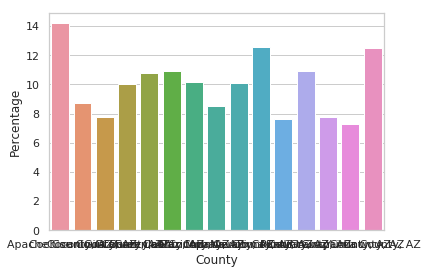

In [64]:
#Bar Graph for 2016 for Arizona Counties
sns.set(style="whitegrid")
a = sns.barplot(x="County", y="Percentage",data=new_d)

# Issue with Bar graph 
One issue with this bar graph is that the color scheme for one is just random - it does not go with high or low percentage. But it looks pretty. 
A second issue with this bar graph is that I don't know how to change the x labels of the states (ex. Arizona --> AZ). I tried to mess around with this but I keep getting errors and I am unsure of how to change the names in dataset. I know this can be done tho. 

In [65]:
#Choropleth Map for 2016

m = fm.Map(location=[34.048927,-111.093735], zoom_start=6)

AZ = 'AZ_counties.json'
Count = new_d

chor = fm.features.Choropleth(
    geo_data=AZ,
    data=Count,
    name='choropleth',
    columns=['County', 'Percentage'],
    key_on='feature.properties.name',
    fill_color='PuBu', fill_opacity=1, line_opacity=0.7,
    legend_name='Diabetes Rate (%)'
).add_to(m)
fm.LayerControl().add_to(m)


m

# Now that I have learned how to FINALLY do a choropleth map, I decided to look at diabetes rates across the country.  

In [76]:
m = fm.Map(location=[34.048927,-111.093735], zoom_start=4)

US = 'US_States.json'
best = alld

chor = fm.features.Choropleth(
    geo_data=US,
    data=best,
    name='choropleth',
    columns=['Name', 'Percentage'],
    key_on='feature.properties.name',
    fill_color='PuBu', fill_opacity=0.5, line_opacity=0.7,
    legend_name='Diabetes Rate for 2016(%)'
).add_to(m)
fm.LayerControl().add_to(m)

m.save(outfile='test.html')

m

In [77]:
#It's supposed to look like this 
#https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html

In [78]:
#Scatterplot for Diabetes in US in 2016
px.scatter(alld, x="Name", y="Percentage")

# Findings 
- The first interesting finding from this set of data was that I found out that Apache County, which is the county I live in, has the highest rate of diabetes for adults aged 20 and older.
- Additionally, although you cannot see it, the second map shows that the state of Alabama has the highest rate of diabetes for adults aged 20 and older in the United States. The interesting thing about this is that I went in believing that states, such as AZ, would have areas of high diabetes in areas where there is a high population of Native Americans, however, Alabama proved this to be wrong as they only have 1 federally recognized tribe where AZ has 22 federally recognized tribes. 